# Generating bifurcation diagram using Python and matplotlib

## First we import required libraries, Numpy is for numerical computing, matplotlib is to generate plots

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['science','notebook'])

In [6]:
#We set figre (plot) size and higher DPI
plt.rcParams["figure.figsize"]=16,9
plt.rcParams['figure.dpi']= 150

## We define a function to plot the bifurcation diagram in a range

In [7]:
def plot_range(begin,end,resolution):
    # Looping through different values of A
    for A in np.linspace(begin,end,resolution):
        #Empty array of Fixed points for each A
        Fixed_points=[]
        #for different initial x
        for xi in np.linspace(0,3,20):
            x=xi
            #iterations to stabilize
            for i in range(1000):
                x=A*x*(1-x)
            #Record 20 iterations
            for i in range(50):
                x=A*x*(1-x)
                if x>10E-5 :
                    Fixed_points.append(x)
        # Dummy array with all values as A similar to Fixed_points
        x=np.ones_like(Fixed_points)*A
        y=Fixed_points
        plt.scatter(x,y,c="black",s=0.001)
        # print("\r"+f"Calculating A={A:.2f}",end="")

## Next step is to plot, This takes a while to complete

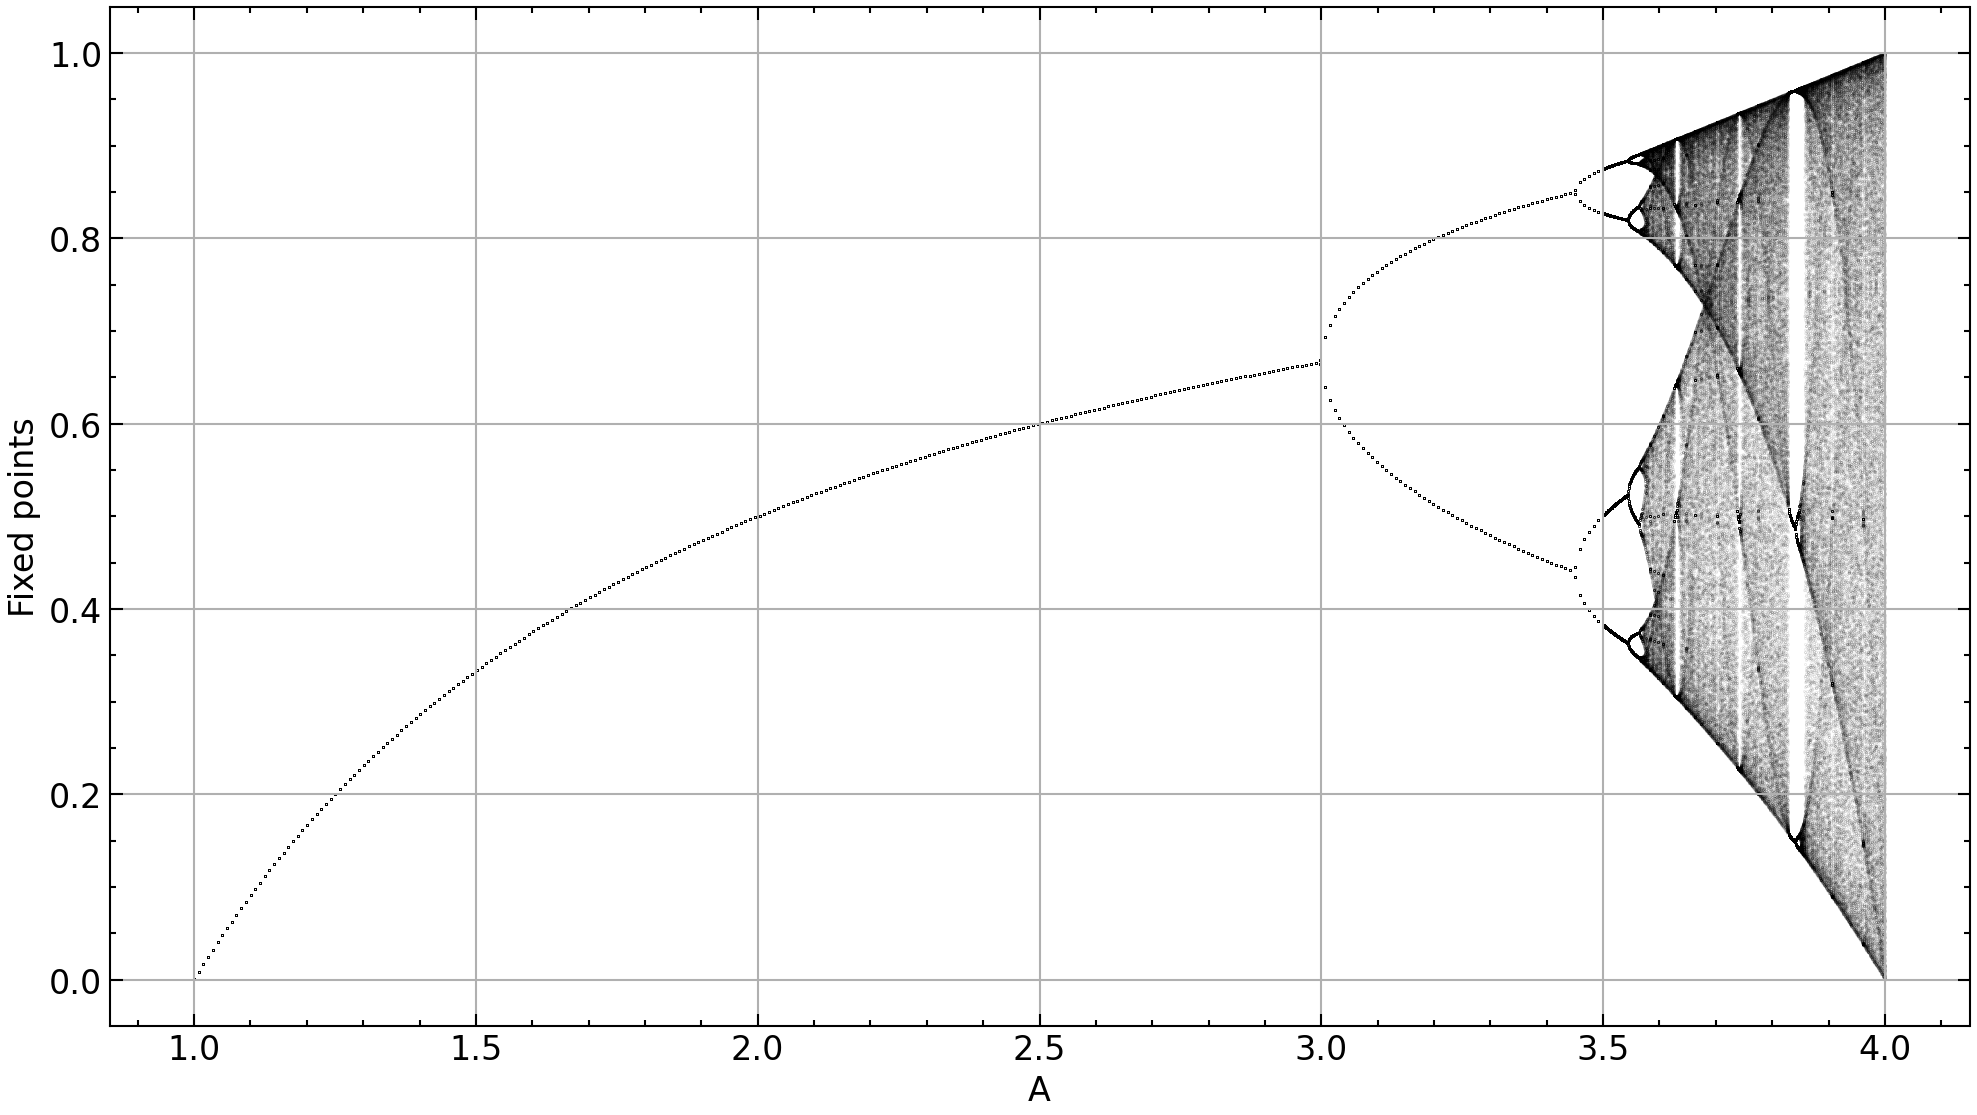

In [8]:
import warnings
#Disable ipython warnings
warnings.filterwarnings('ignore')

#Since activity is low till 3.5, we can use smaller number of points
plot_range(begin=1,end=3.5,resolution=300)

#Increasing the density of points after 3.5
plot_range(3.5,4,resolution=700)

#Add axis labels and save the generated plot as PNG image
plt.xlabel("A")
plt.ylabel("Fixed points")
plt.grid()

# Show plot
plt.show()

## This takes long time (on a decent hardware) and still does not produced dense enough plot. This can be improved by using python broadcasting. This will trade memory for better performance. So we define another function which uses broadcasting.

In [9]:

def faster_plot(begin,end,resolution,iterations,alpha):
    A=np.linspace(begin,end,resolution)
    #Random initial vector between 0 and 3
    x=np.random.rand(resolution)*3

    for i in range(iterations):
        x=A*x*(1-x)

    for i in range(200):
        # plt.plot(A,x,',',c="k",alpha=alpha)
        plt.scatter(A,x,c="black",s=0.001,alpha=alpha)
        x=A*x*(1-x)


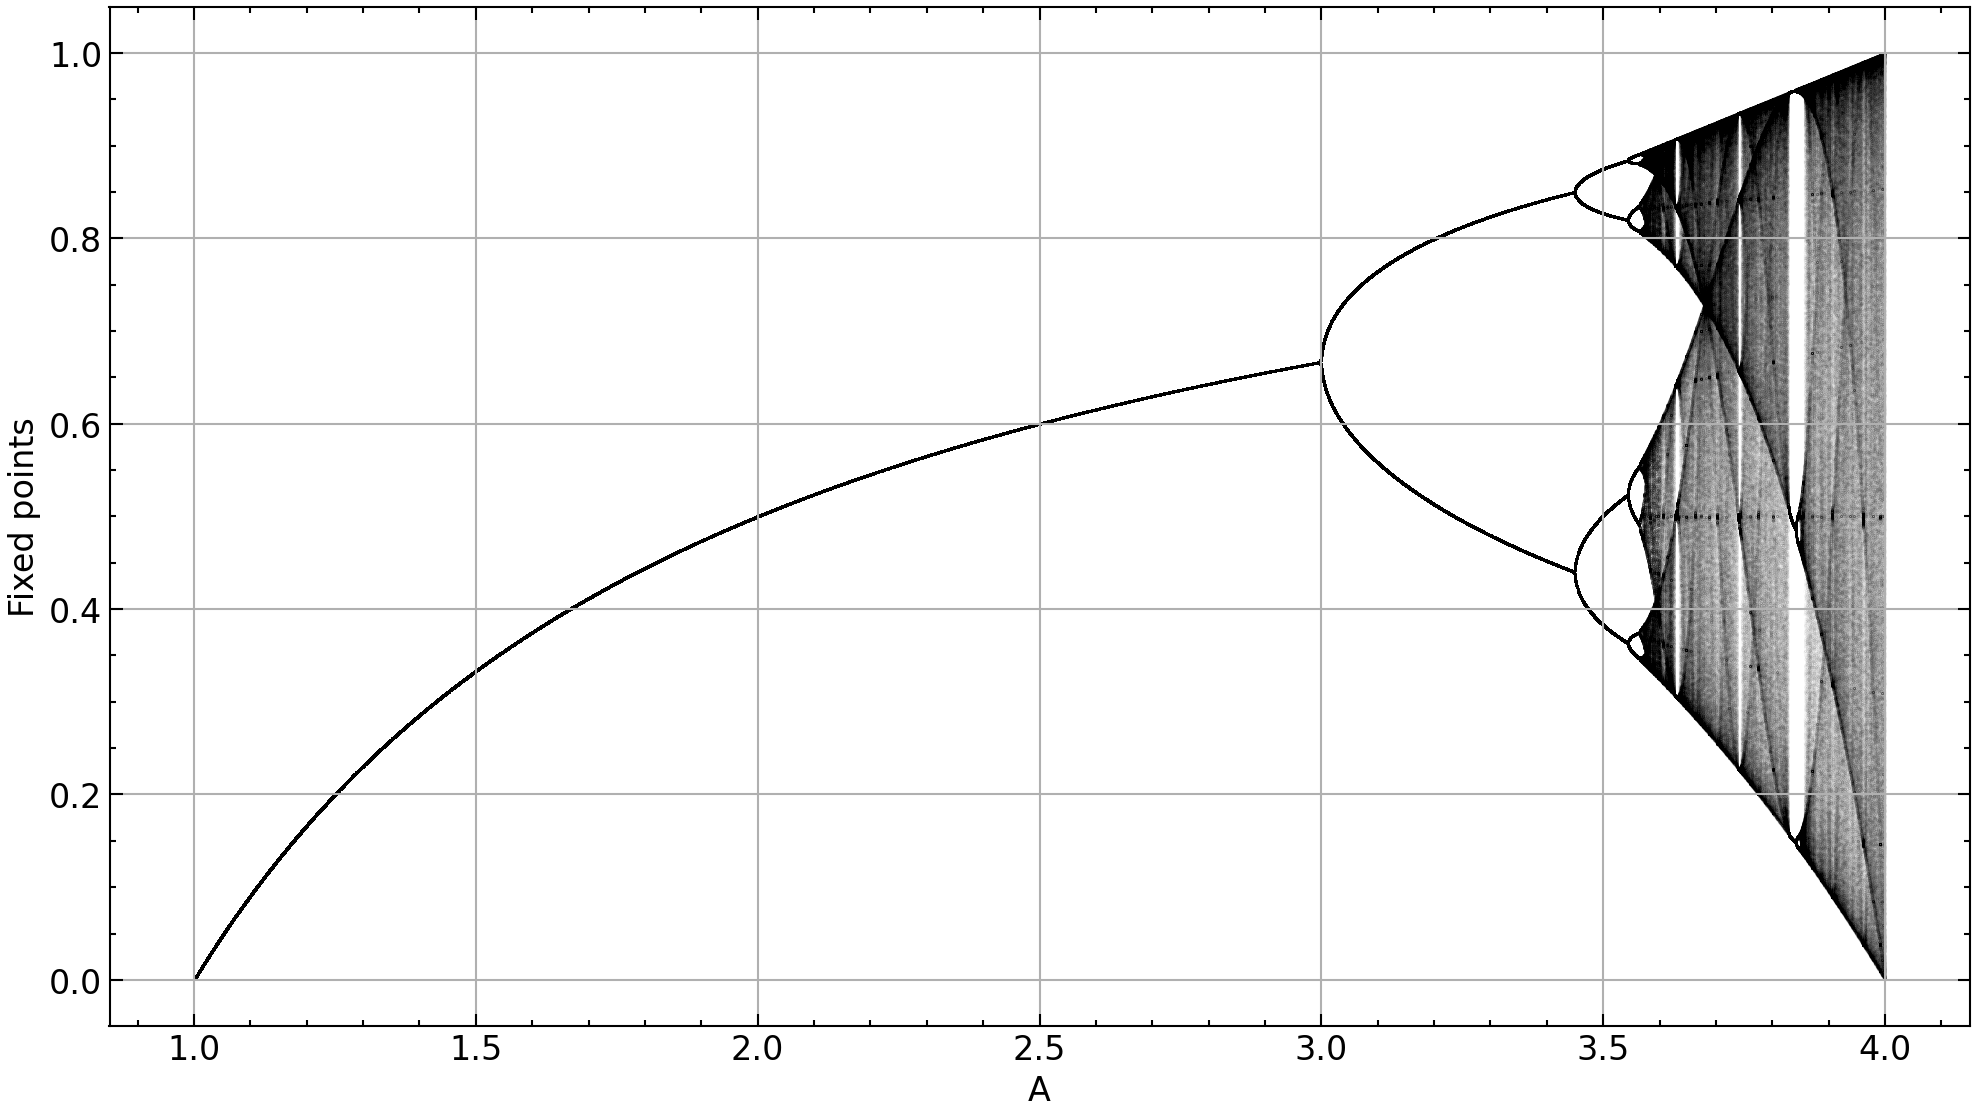

In [10]:
plt.grid()
plt.xlabel("A")
plt.ylabel("Fixed points")
faster_plot(1,3.6,resolution=50000,iterations=1000,alpha=1)
faster_plot(3.6,4,resolution=20000,iterations=1000,alpha=0.2)
plt.show()


## This is almost thrice as faster. We notice lot of stuff happening between 3 to 4, so focusing there,

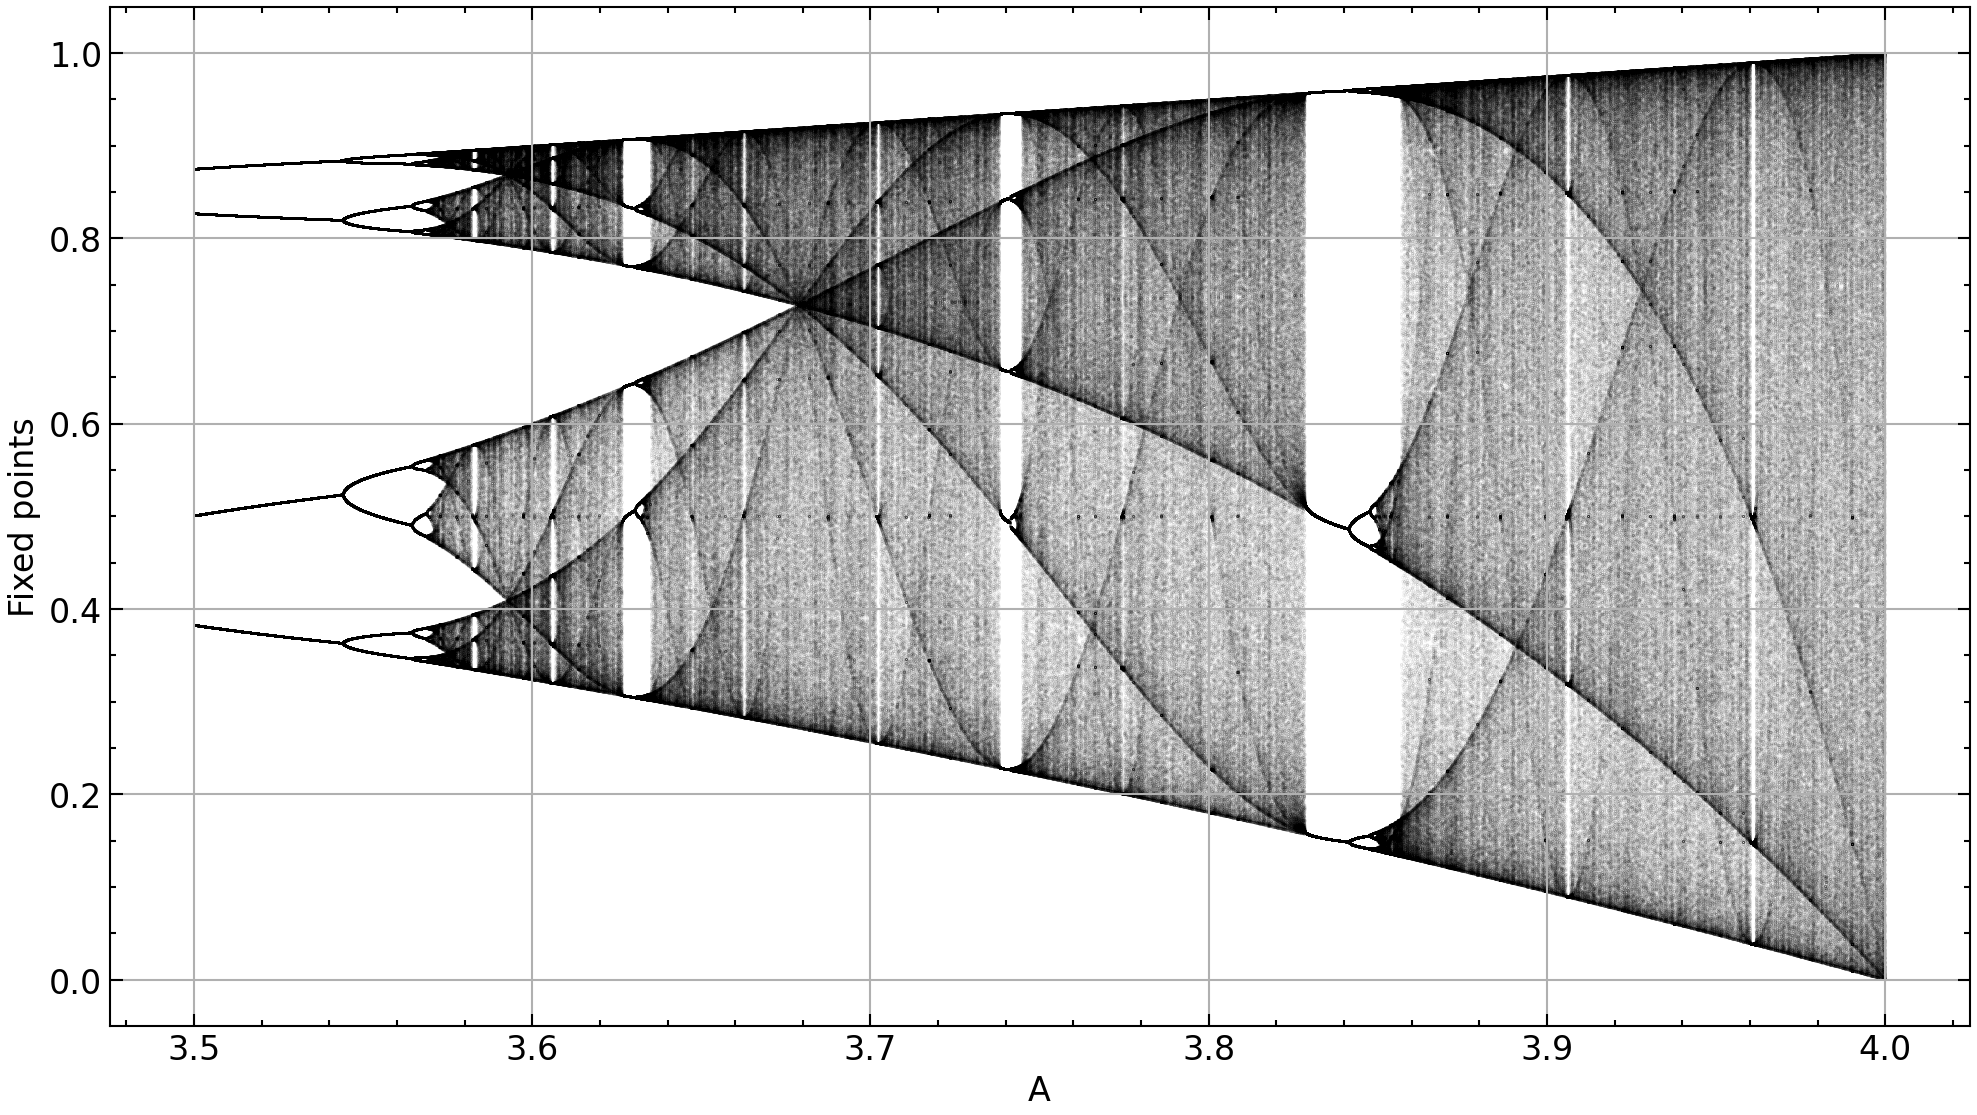

In [11]:
plt.clf()
plt.rcParams["figure.figsize"]=16,9
plt.xlabel("A")
plt.ylabel("Fixed points")
plt.grid()
faster_plot(3.5,4,resolution=40000,iterations=1000,alpha=0.6)
plt.show()

## We can see self similarity, zooming in on a region, (Observe x and y scale)

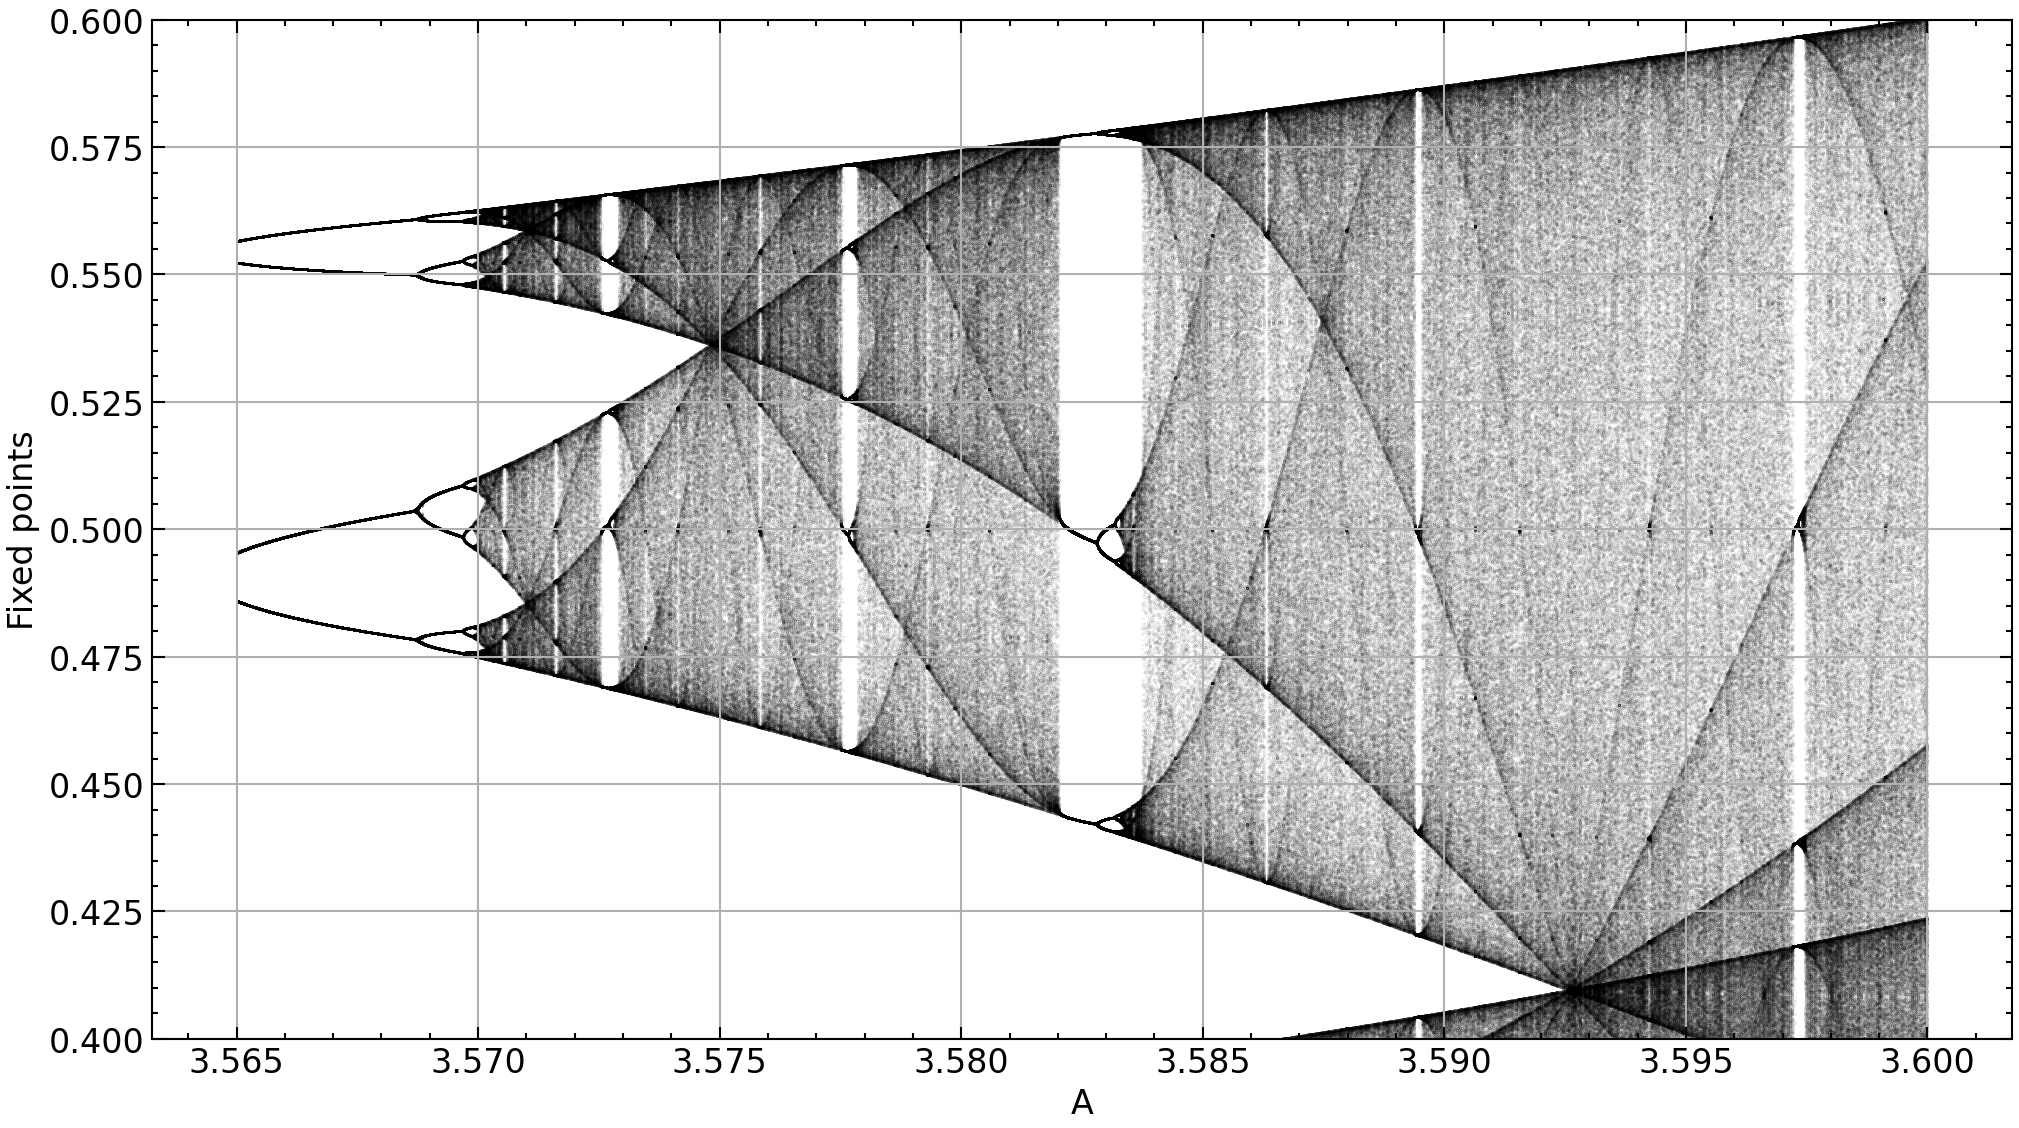

In [12]:
plt.clf()
plt.rcParams["figure.figsize"]=16,9
plt.grid()
plt.ylim(0.4, 0.6)
plt.xlabel("A")
plt.ylabel("Fixed points")
faster_plot(3.565,3.6,resolution=80000,iterations=1000,alpha=1)
plt.show()

## So we can see that the bifurcation diagram is a fractal